In [2]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd

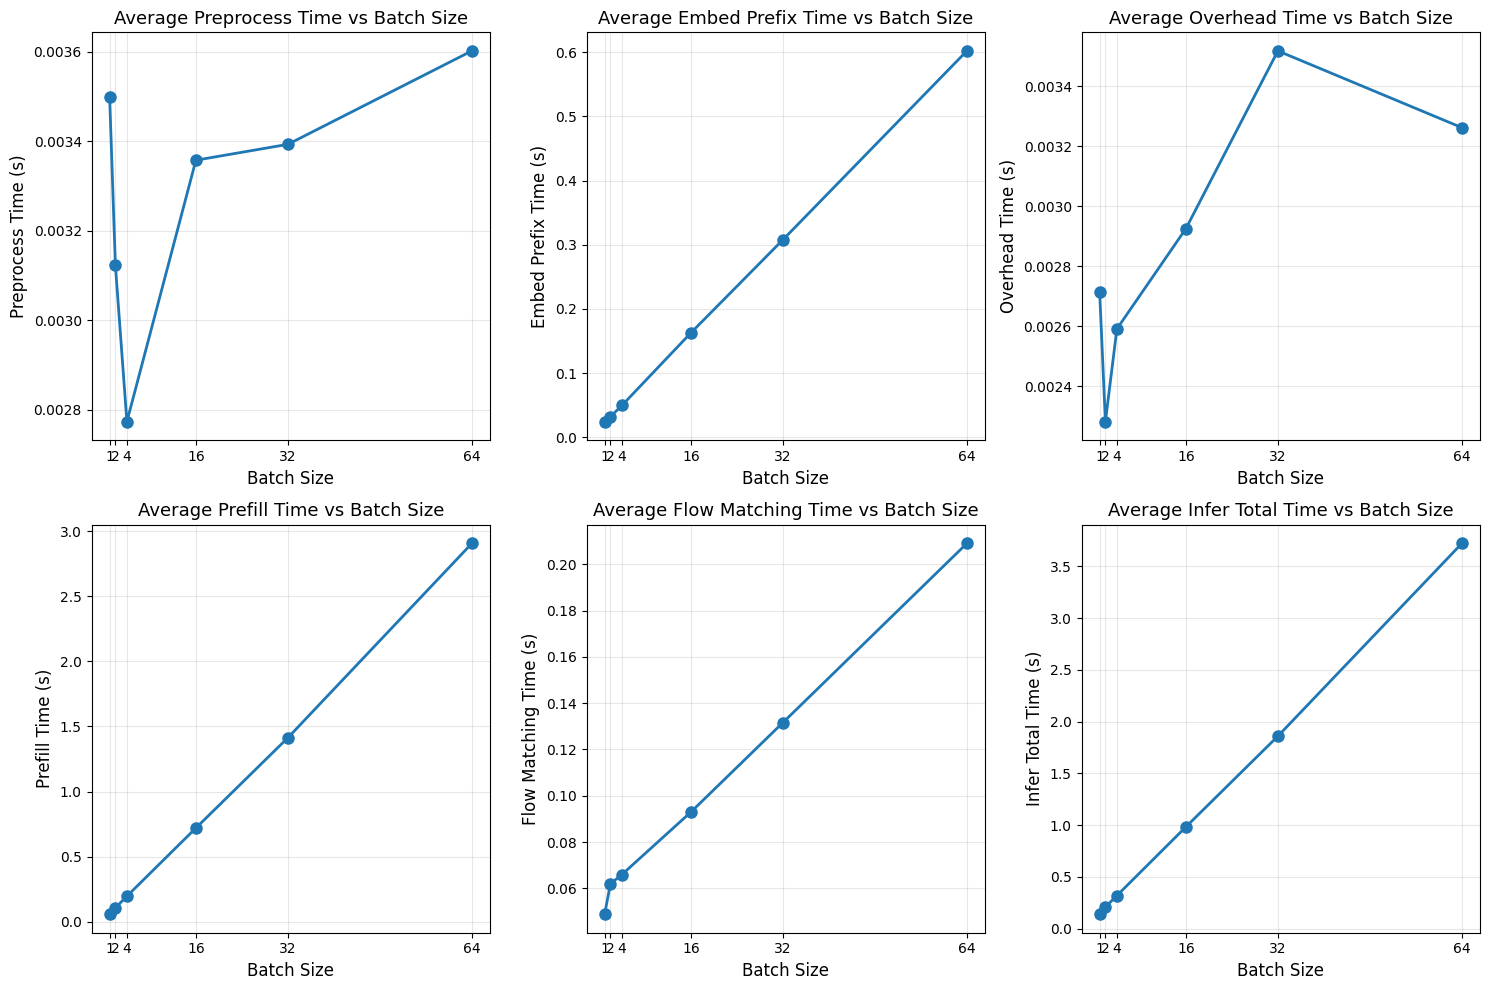

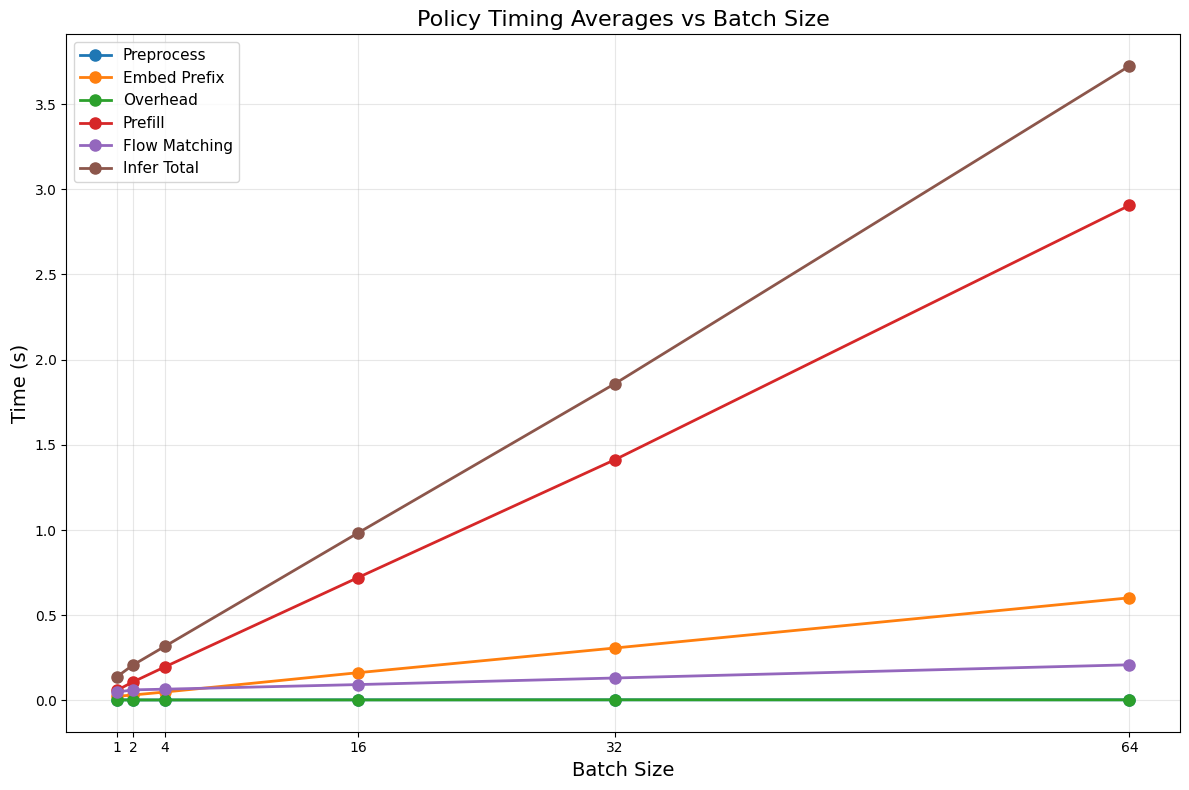


Summary Statistics:

Batch Size: 1
----------------------------------------
  Preprocess          : 0.003498 ± 0.000430 s
  Embed Prefix        : 0.024159 ± 0.000153 s
  Overhead            : 0.002715 ± 0.000837 s
  Prefill             : 0.059546 ± 0.000589 s
  Flow Matching       : 0.048823 ± 0.000664 s
  Infer Total         : 0.138771 ± 0.001467 s

Batch Size: 2
----------------------------------------
  Preprocess          : 0.003122 ± 0.000570 s
  Embed Prefix        : 0.031893 ± 0.000187 s
  Overhead            : 0.002282 ± 0.000522 s
  Prefill             : 0.108463 ± 0.000293 s
  Flow Matching       : 0.061899 ± 0.000618 s
  Infer Total         : 0.207686 ± 0.001072 s

Batch Size: 4
----------------------------------------
  Preprocess          : 0.002773 ± 0.000528 s
  Embed Prefix        : 0.049402 ± 0.000189 s
  Overhead            : 0.002592 ± 0.000789 s
  Prefill             : 0.197551 ± 0.000435 s
  Flow Matching       : 0.065935 ± 0.001041 s
  Infer Total         : 0.318

In [3]:
from collections import defaultdict

import numpy as np

benchmark_results_dir = "/nethome/dhe83/flash/openpi/benchmarks/latency_batching_300"

# Dictionary to store timing data by batch size
timing_by_batch = defaultdict(
    lambda: {
        "preprocess": [],
        "embed_prefix": [],
        "overhead": [],
        "prefill": [],
        "flow_matching": [],
        "infer_total": [],
    }
)

# Load all benchmark files
for filename in os.listdir(benchmark_results_dir):
    if not filename.endswith(".json"):
        continue

    filepath = os.path.join(benchmark_results_dir, filename)
    with open(filepath) as f:
        data = json.load(f)

    batch_size = data.get("batch_size")
    if batch_size is None:
        continue

    # Extract policy_timing data
    policy_timing = data.get("policy_timing", [])
    if not policy_timing:
        continue

    # Collect all timing values for this batch size
    for timing_entry in policy_timing:
        for key in ["preprocess", "embed_prefix", "overhead", "prefill", "flow_matching", "infer_total"]:
            if key in timing_entry:
                timing_by_batch[batch_size][key].append(timing_entry[key])

# Calculate averages for each batch size
batch_sizes = sorted(timing_by_batch.keys())
averages = {"preprocess": [], "embed_prefix": [], "overhead": [], "prefill": [], "flow_matching": [], "infer_total": []}

for batch_size in batch_sizes:
    for key in averages:
        values = timing_by_batch[batch_size][key]
        if values:
            averages[key].append(np.mean(values))
        else:
            averages[key].append(0)

# Create the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metrics = ["preprocess", "embed_prefix", "overhead", "prefill", "flow_matching", "infer_total"]
metric_labels = ["Preprocess", "Embed Prefix", "Overhead", "Prefill", "Flow Matching", "Infer Total"]

for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[idx]
    ax.plot(batch_sizes, averages[metric], marker="o", linewidth=2, markersize=8)
    ax.set_xlabel("Batch Size", fontsize=12)
    ax.set_ylabel(f"{label} Time (s)", fontsize=12)
    ax.set_title(f"Average {label} Time vs Batch Size", fontsize=13)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(batch_sizes)

plt.tight_layout()
plt.show()

# Also create a single plot with all metrics
plt.figure(figsize=(12, 8))
for metric, label in zip(metrics, metric_labels):
    plt.plot(batch_sizes, averages[metric], marker="o", linewidth=2, markersize=8, label=label)

plt.xlabel("Batch Size", fontsize=14)
plt.ylabel("Time (s)", fontsize=14)
plt.title("Policy Timing Averages vs Batch Size", fontsize=16)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(batch_sizes)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 60)
for batch_size in batch_sizes:
    print(f"\nBatch Size: {batch_size}")
    print("-" * 40)
    for metric, label in zip(metrics, metric_labels):
        values = timing_by_batch[batch_size][metric]
        if values:
            mean_val = np.mean(values)
            std_val = np.std(values)
            print(f"  {label:20s}: {mean_val:.6f} ± {std_val:.6f} s")

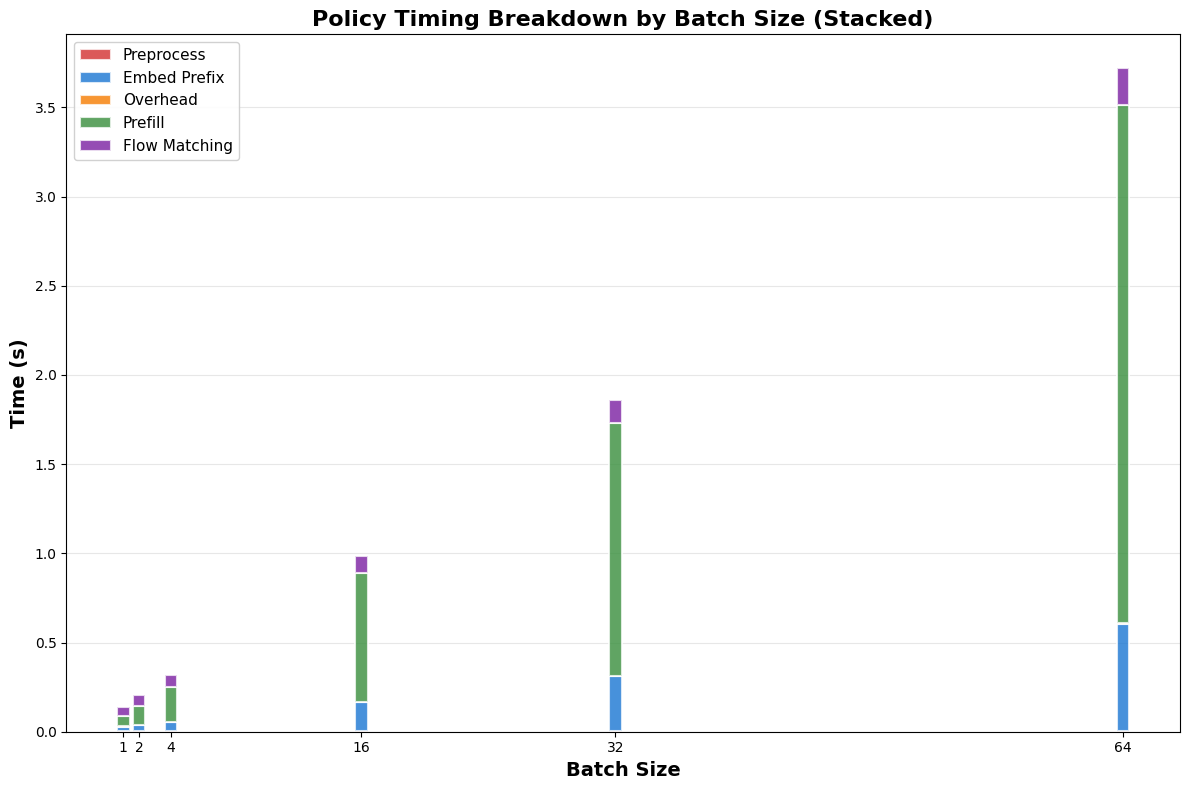

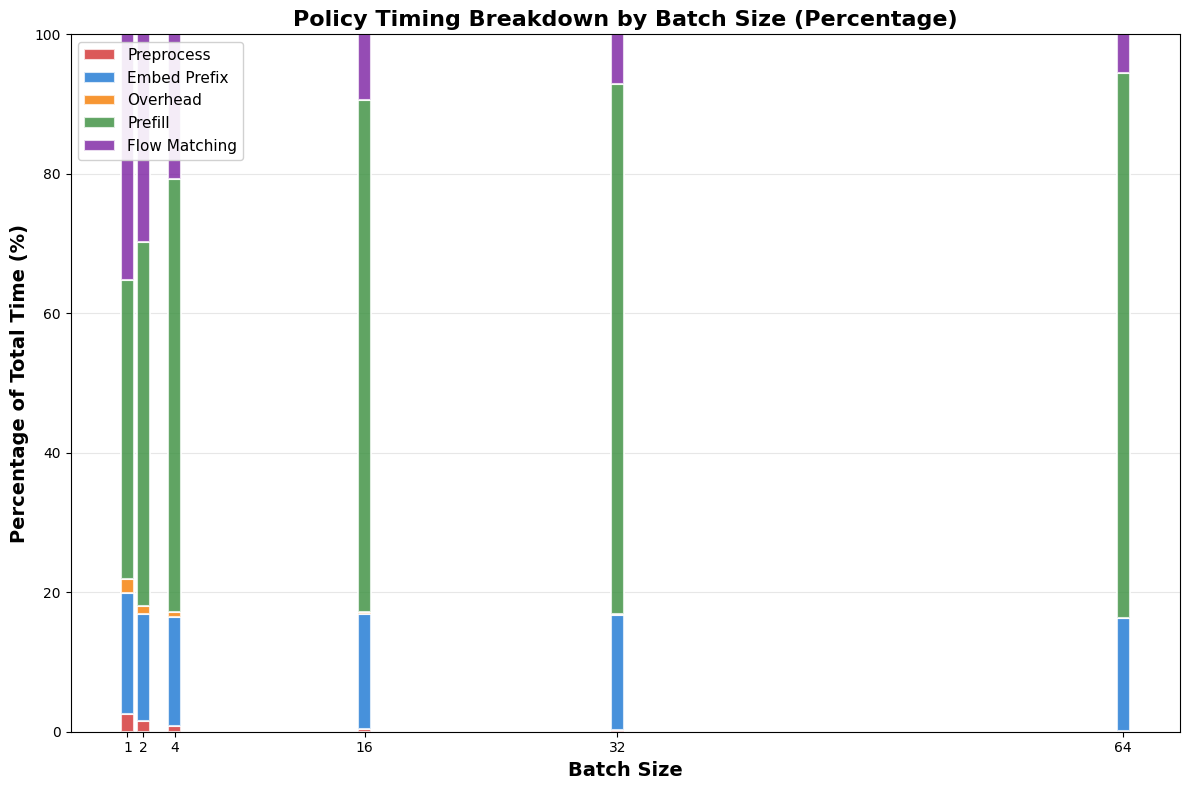

In [4]:
from collections import defaultdict
import json
import os

import matplotlib.pyplot as plt
import numpy as np

benchmark_results_dir = "/srv/rl2-lab/flash8/rbansal66/vvla/openpi/benchmarks/latency_batching_300"

# Dictionary to store timing data by batch size
timing_by_batch = defaultdict(
    lambda: {
        "preprocess": [],
        "embed_prefix": [],
        "overhead": [],
        "prefill": [],
        "flow_matching": [],
        "infer_total": [],
    }
)

# Load all benchmark files
for filename in os.listdir(benchmark_results_dir):
    if not filename.endswith(".json"):
        continue

    filepath = os.path.join(benchmark_results_dir, filename)
    with open(filepath) as f:
        data = json.load(f)

    batch_size = data.get("batch_size")
    if batch_size is None:
        continue

    # Extract policy_timing data
    policy_timing = data.get("policy_timing", [])
    if not policy_timing:
        continue

    # Collect all timing values for this batch size
    for timing_entry in policy_timing:
        for key in ["preprocess", "embed_prefix", "overhead", "prefill", "flow_matching", "infer_total"]:
            if key in timing_entry:
                timing_by_batch[batch_size][key].append(timing_entry[key])

# Calculate averages for each batch size
batch_sizes = sorted(timing_by_batch.keys())
averages = {"preprocess": [], "embed_prefix": [], "overhead": [], "prefill": [], "flow_matching": []}

for batch_size in batch_sizes:
    for key in averages.keys():
        values = timing_by_batch[batch_size][key]
        if values:
            averages[key].append(np.mean(values))
        else:
            averages[key].append(0)

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each component
# Alternative: Even more contrasting colors
colors = {
    "preprocess": "#D32F2F",  # Deep red
    "embed_prefix": "#1976D2",  # Deep blue
    "overhead": "#F57C00",  # Deep orange
    "prefill": "#388E3C",  # Deep green
    "flow_matching": "#7B1FA2",  # Deep purple
}

# Order of stacking (bottom to top)
stack_order = ["preprocess", "embed_prefix", "overhead", "prefill", "flow_matching"]
labels = ["Preprocess", "Embed Prefix", "Overhead", "Prefill", "Flow Matching"]

# Create the stacked bars
bottom = np.zeros(len(batch_sizes))
bars = []

for metric, label in zip(stack_order, labels):
    values = averages[metric]
    bars.append(
        ax.bar(
            batch_sizes,
            values,
            bottom=bottom,
            label=label,
            color=colors[metric],
            alpha=0.8,
            edgecolor="white",
            linewidth=1.5,
        )
    )
    bottom += values

# Customize the plot
ax.set_xlabel("Batch Size", fontsize=14, fontweight="bold")
ax.set_ylabel("Time (s)", fontsize=14, fontweight="bold")
ax.set_title("Policy Timing Breakdown by Batch Size (Stacked)", fontsize=16, fontweight="bold")
ax.set_xticks(batch_sizes)
ax.legend(loc="upper left", fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, axis="y")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Alternative: Stacked bar plot showing percentage contribution
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate percentages
percentages = {}
for metric in stack_order:
    percentages[metric] = []
    for i, batch_size in enumerate(batch_sizes):
        total = sum(averages[m][i] for m in stack_order)
        if total > 0:
            percentages[metric].append(100 * averages[metric][i] / total)
        else:
            percentages[metric].append(0)

# Create percentage stacked bars
bottom = np.zeros(len(batch_sizes))
for metric, label in zip(stack_order, labels):
    values = percentages[metric]
    ax.bar(
        batch_sizes,
        values,
        bottom=bottom,
        label=label,
        color=colors[metric],
        alpha=0.8,
        edgecolor="white",
        linewidth=1.5,
    )
    bottom += values

ax.set_xlabel("Batch Size", fontsize=14, fontweight="bold")
ax.set_ylabel("Percentage of Total Time (%)", fontsize=14, fontweight="bold")
ax.set_title("Policy Timing Breakdown by Batch Size (Percentage)", fontsize=16, fontweight="bold")
ax.set_xticks(batch_sizes)
ax.set_ylim(0, 100)
ax.legend(loc="upper left", fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, axis="y")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [15]:
# benchmark_results_dir = "../benchmarks/latency"
# benchmark_results_dir = "../benchmarks/latency_batching"
benchmark_results_dir = "/srv/rl2-lab/flash8/rbansal66/vvla/openpi/benchmarks/latency_batching_timeout_1"

data = []
for filename in os.listdir(benchmark_results_dir):
    with open(os.path.join(benchmark_results_dir, filename)) as f:
        row = json.load(f)
    # select specifc keys from data
    row = {
        k: row[k]
        for k in [
            "num_steps",
            "action_horizon",
            "batch_size",
            "request_rate",
            "request_throughput",
            "mean_latency_ms",
            "median_latency_ms",
            "std_latency_ms",
            "p95_latency_ms",
            "p99_latency_ms",
        ]
    }
    data.append(row)
df = pd.DataFrame(data)

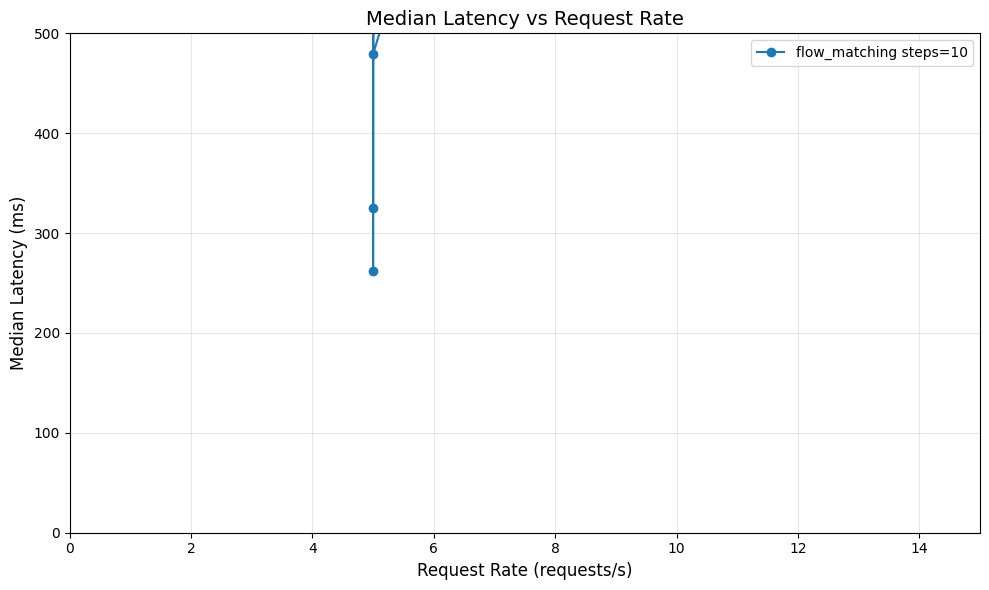

In [6]:
# Create the plot
plt.figure(figsize=(10, 6))

# Get unique num_steps values
num_steps_values = sorted(df["num_steps"].unique())

# Plot a line for each num_steps value
for num_steps in num_steps_values:
    df_filtered = df[df["num_steps"] == num_steps].sort_values("request_rate")
    plt.plot(
        df_filtered["request_rate"],
        df_filtered["median_latency_ms"],
        marker="o",
        label=f"flow_matching steps={num_steps}",
    )

plt.xlim(0, 15)
plt.ylim(0, 500)
plt.xlabel("Request Rate (requests/s)", fontsize=12)
plt.ylabel("Median Latency (ms)", fontsize=12)
plt.title("Median Latency vs Request Rate", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

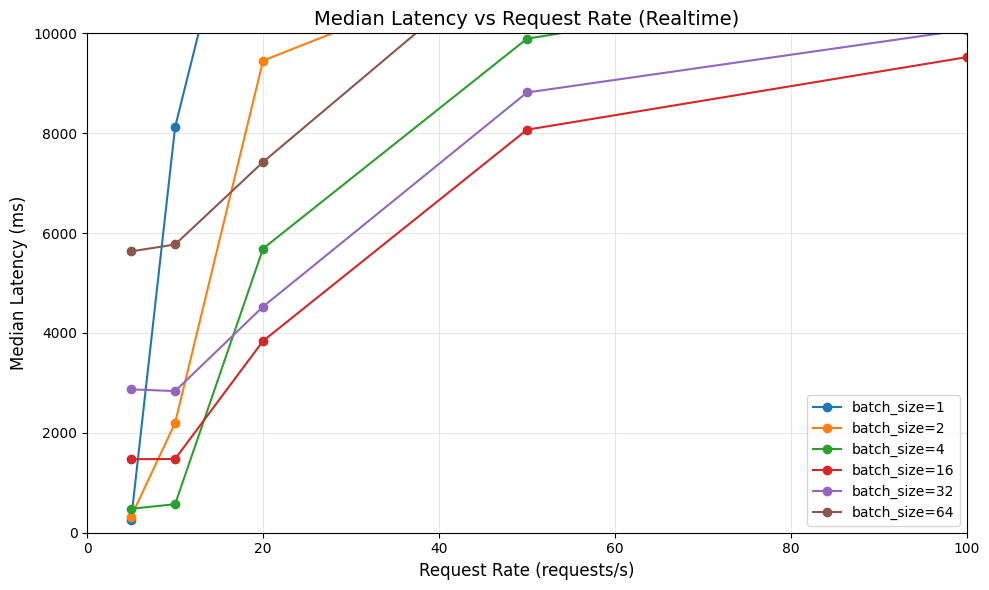

In [7]:
# Create the plot
plt.figure(figsize=(10, 6))

# Get unique num_steps values
batch_sizes = sorted(df["batch_size"].unique())

# Plot a line for each num_steps value
for batch_size in batch_sizes:
    df_filtered = df[df["batch_size"] == batch_size].sort_values("request_rate")
    plt.plot(
        df_filtered["request_rate"], df_filtered["median_latency_ms"], marker="o", label=f"batch_size={batch_size}"
    )


plt.xlim(0, 100)
plt.ylim(0, 10000)
plt.xlabel("Request Rate (requests/s)", fontsize=12)
plt.ylabel("Median Latency (ms)", fontsize=12)
plt.title("Median Latency vs Request Rate (Realtime)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'df2' is not defined

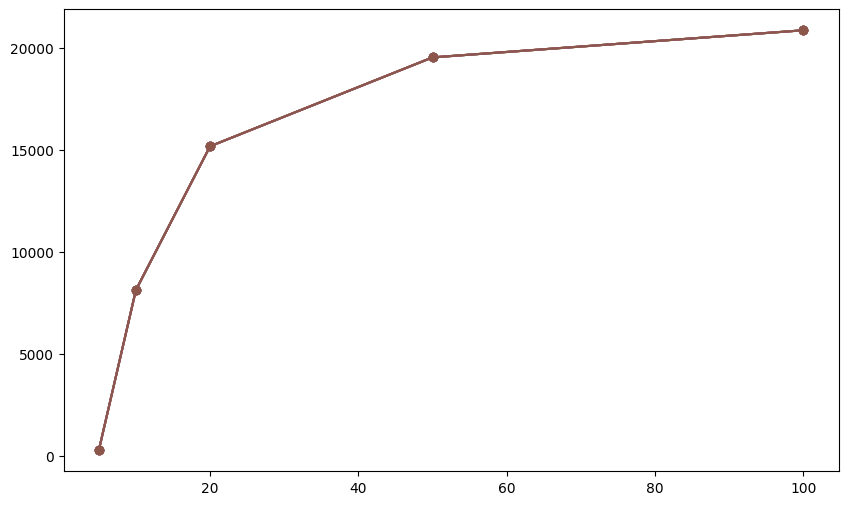

In [8]:
# Create the plot
plt.figure(figsize=(10, 6))

# Get unique num_steps values
batch_sizes = sorted(df["batch_size"].unique())

# Plot a line for each num_steps value
for batch_size in batch_sizes:
    df_filtered = df[df["batch_size"] == 1].sort_values("request_rate")
    plt.plot(
        df_filtered["request_rate"],
        df_filtered["median_latency_ms"],
        marker="o",
        label=f"realtime, batch_size={batch_size}",
    )

for batch_size in batch_sizes:
    df_filtered = df2[df2["batch_size"] == 1].sort_values("request_rate")
    plt.plot(
        df_filtered["request_rate"],
        df_filtered["median_latency_ms"],
        marker="o",
        label=f"no realtime, batch_size={batch_size}",
    )

plt.xlim(0, 100)
plt.ylim(0, 10000)
plt.xlabel("Request Rate (requests/s)", fontsize=12)
plt.ylabel("Median Latency (ms)", fontsize=12)
plt.title("Median Latency vs Request Rate", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

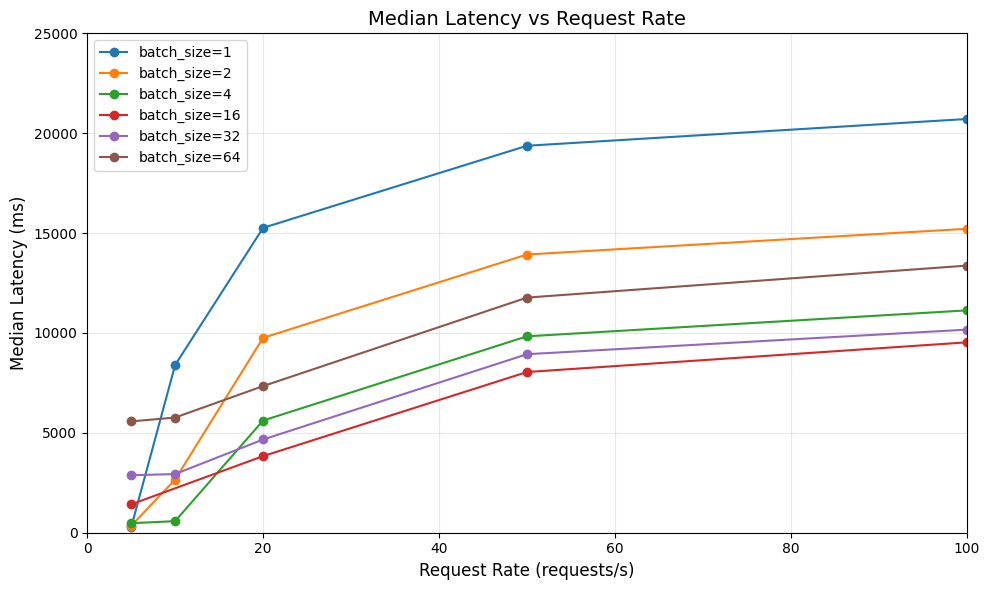

In [17]:
# Create the plot
plt.figure(figsize=(10, 6))

# Get unique num_steps values
batch_sizes = sorted(df["batch_size"].unique())

# Plot a line for each num_steps value
for batch_size in batch_sizes:
    df_filtered = df[df["batch_size"] == batch_size].sort_values("request_rate")
    plt.plot(
        df_filtered["request_rate"], df_filtered["median_latency_ms"], marker="o", label=f"batch_size={batch_size}"
    )


plt.xlim(0, 20)
plt.ylim(0, 1000)
plt.xlabel("Request Rate (requests/s)", fontsize=12)
plt.ylabel("Median Latency (ms)", fontsize=12)
plt.title("Median Latency vs Request Rate", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()